### Sravani Tungala

### The SparksFoundation

### Task#5:

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 

● As a sports analysts, find out the most successful teams, players and factors 

contributing win or loss of a team.

### Necessary Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Data reading

In [79]:
df_delivers=pd.read_csv('deliveries.csv')

In [5]:
df_matches=pd.read_csv('matches.csv')

In [8]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [10]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [16]:
for col in df_matches.columns:
    print(df_matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

### Number of Observations

In [18]:
df_matches.shape

(756, 18)

In [19]:
#the first index that doesn't contain a NaN value 
df_matches.umpire3.first_valid_index()

636

In [21]:
#Confirming the first valid index
df_matches.loc[633:640]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
636,7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


In [22]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Droping the column umpire3 since it doesn't affect the data

In [23]:
df_matches= df_matches.drop(columns=['umpire3'], axis=1)

In [24]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


### Exploratory Data Analysis and visualization

In [28]:
sns.color_palette("Paired")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

### The team with the most number of wins per season.

In [29]:
teams_per_season = df_matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [30]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [31]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


### Plotting the graph team and wins

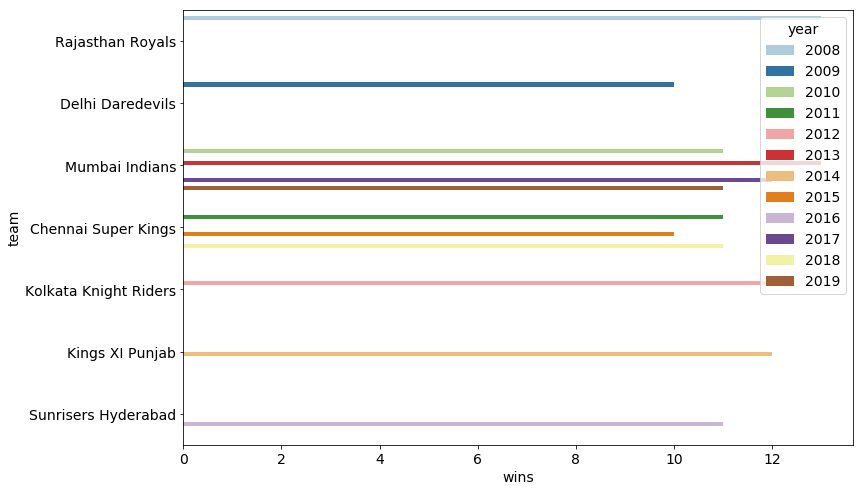

In [32]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

### Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

### The venue that hosted the maximum number of matches


In [34]:
venue_ser = df_matches['venue'].value_counts()

In [35]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [36]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


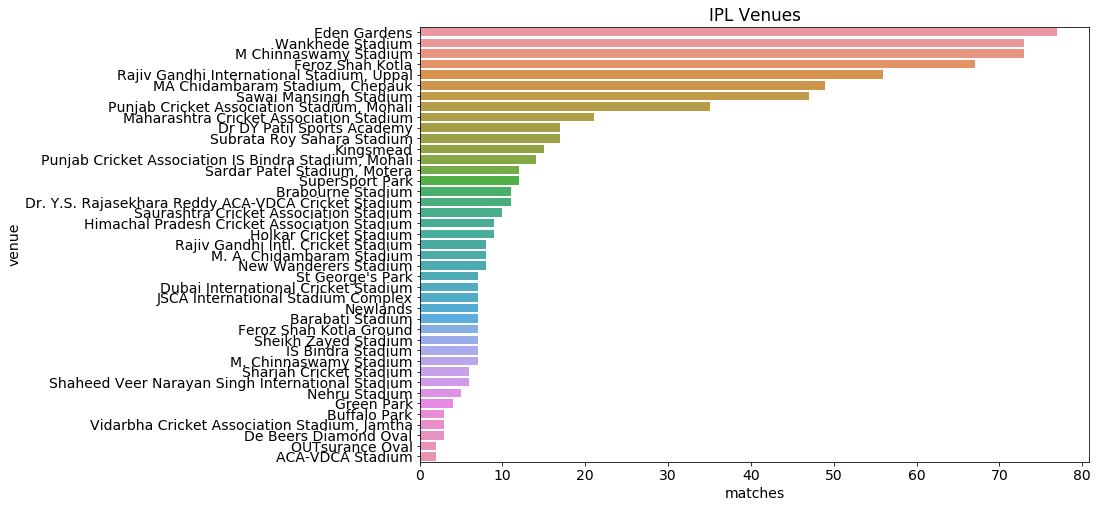

In [37]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

### Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
### Till 2019, IPL matches were hosted by 40 venues.

In [38]:
# The most successful IPL team

team_wins_ser = df_matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [39]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


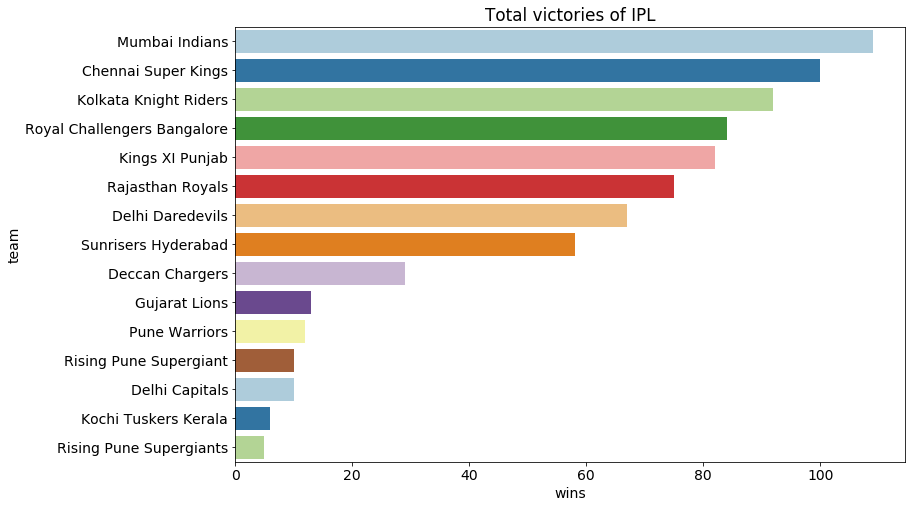

In [43]:
plt.title("Total victories of IPL")
sns.barplot('wins','team',data=team_wins_df,palette='Paired')

### Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

In [45]:
# Most Valuable Player

mvp_ser = df_matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1 

In [50]:
print(mvp_ser)

CH Gayle           21
AB de Villiers     20
DA Warner          17
RG Sharma          17
MS Dhoni           17
YK Pathan          16
SR Watson          15
SK Raina           14
G Gambhir          13
MEK Hussey         12
AM Rahane          12
V Kohli            12
DR Smith           11
A Mishra           11
AD Russell         11
V Sehwag           11
JH Kallis          10
KA Pollard         10
SE Marsh            9
AT Rayudu           9
SP Narine           9
Harbhajan Singh     8
UT Yadav            8
SR Tendulkar        8
RA Jadeja           8
Rashid Khan         7
RV Uthappa          7
AC Gilchrist        7
HH Pandya           6
BJ Hodge            6
                   ..
L Ngidi             1
KV Sharma           1
S Anirudha          1
PD Collingwood      1
H Gurney            1
RP Singh            1
BCJ Cutting         1
AP Tare             1
Imran Tahir         1
MD Mishra           1
Z Khan              1
Mohammed Siraj      1
J Botha             1
GJ Bailey           1
KMDN Kulas

In [51]:
#Top ten most valuable playes
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


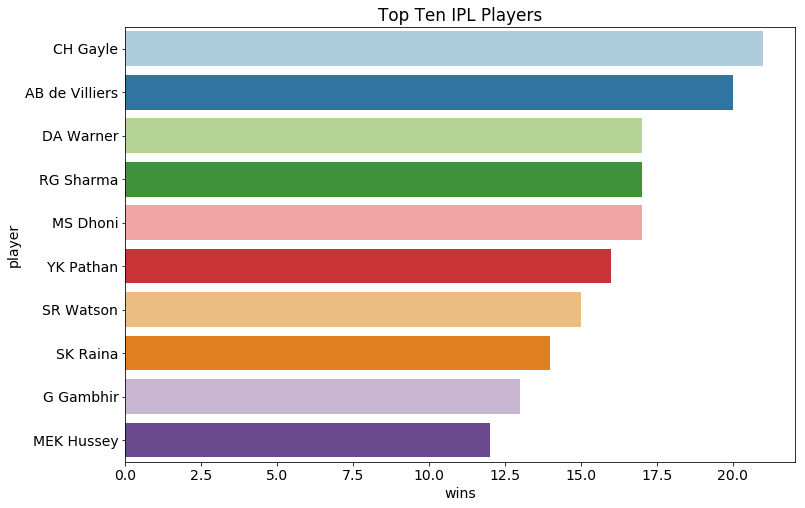

In [52]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

## Observations:
### Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.
### Six Indian players have figured in the top ten IPL players list.

In [53]:
# The team that won the most number of toss

toss_ser = df_matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)

In [54]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


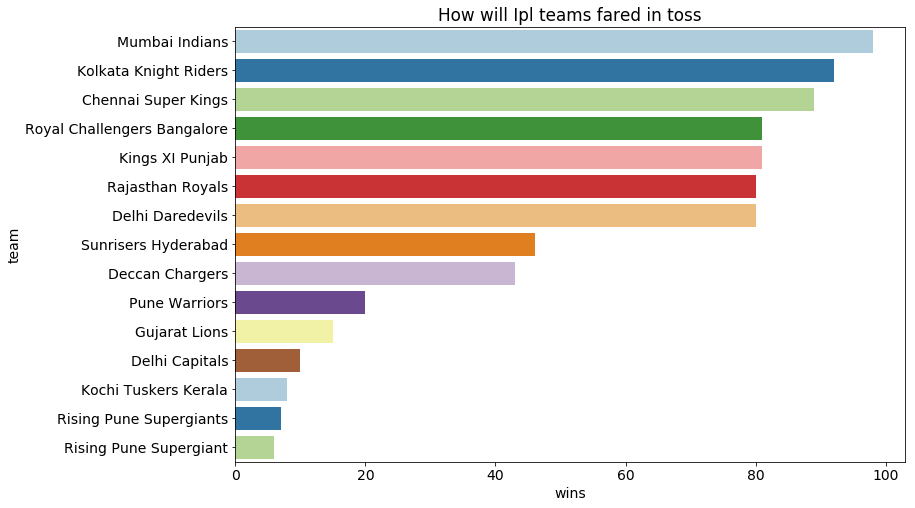

In [57]:
plt.title("How will Ipl teams fared in toss")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

### Observations:
#### Mumbai Indians has won the most toss(till 2019) in IPL history.
#### All the top teams in IPL are successful in winning the toss as well

In [59]:
#umpire has officiated the most number of IPL matches on-field?
umpire1_ser = df_matches['umpire1'].value_counts()
umpire2_ser = df_matches['umpire2'].value_counts()

In [60]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

C:\Users\A C\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,umpire1,umpire2
A Deshmukh,3.0,3.0
A Nand Kishore,11.0,5.0
A Nanda Kishore,1.0,4.0
A.D Deshmukh,NaN,6.0
AK Chaudhary,43.0,15.0
AL Hill,NaN,6.0
AM Saheba,3.0,23.0
AV Jayaprakash,2.0,4.0
AY Dandekar,13.0,NaN
Aleem Dar,38.0,NaN


In [62]:
umpires_df.head()

,umpire1,umpire2
A Deshmukh,3.0,3.0
A Nand Kishore,11.0,5.0
A Nanda Kishore,1.0,4.0
A.D Deshmukh,NaN,6.0
AK Chaudhary,43.0,15.0


In [63]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 

In [64]:
umpire_df

,umpire,matches
0,A Deshmukh,6.0
1,A Nand Kishore,16.0
2,A Nanda Kishore,5.0
3,A.D Deshmukh,6.0
4,AK Chaudhary,58.0
5,AL Hill,6.0
6,AM Saheba,26.0
7,AV Jayaprakash,6.0
8,AY Dandekar,13.0
9,Aleem Dar,38.0


In [65]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
57,S Ravi,106.0
25,HDPK Dharmasena,87.0
18,C Shamshuddin,73.0
4,AK Chaudhary,58.0
61,SJA Taufel,55.0


In [69]:
# city has hosted the maximum number of IPL matches
df_matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cape Town           7
Cuttack             7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [71]:
city_ser = df_matches['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)

In [72]:
city_df

,city,matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


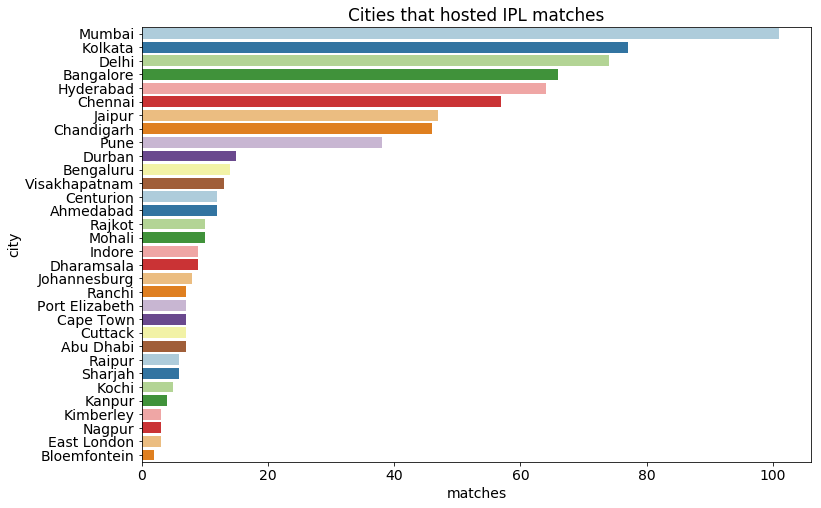

In [74]:
plt.title('Cities that hosted IPL matches')
sns.barplot('matches','city',data=city_df,palette='Paired')

In [75]:
len(df_matches)

756

In [77]:
defend_vict_ser = df_matches['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
98       1
77       1
93       1
102      1
87       1
105      1
111      1
118      1
138      1
140      1
42       1
74       1
76       1
75       1
130      1
47       1
144      1
66       1
64       1
62       1
61       1
60       1
67       1
57       1
59       1
50       1
36       1
72       1
53       1
      ... 
38       5
45       5
8        5
41       5
16       6
27       6
34       6
5        6
20       6
18       7
17       7
6        7
25       7
11       7
2        7
24       8
37       8
19       8
12       8
22       9
9        9
7        9
15       9
23       9
13       9
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [80]:
print("Basic Overview of Deliveries Dataset : \n")
print(df_delivers.info())

Basic Overview of Deliveries Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
field

In [82]:
print("Number Of Innings And Their Counts : \n",df_delivers['inning'].value_counts())

Number Of Innings And Their Counts : 
 1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64


In [83]:
print("Batting Team 's Max Counts :",df_delivers['batting_team'].value_counts())

Batting Team 's Max Counts : Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64


In [84]:
print("Number Of Super Over Matches  : \n",df_delivers['is_super_over'].value_counts())

Number Of Super Over Matches  : 
 0    178997
1        81
Name: is_super_over, dtype: int64


Text(0.5, 1.0, 'Wide Runs Scored In Matches')

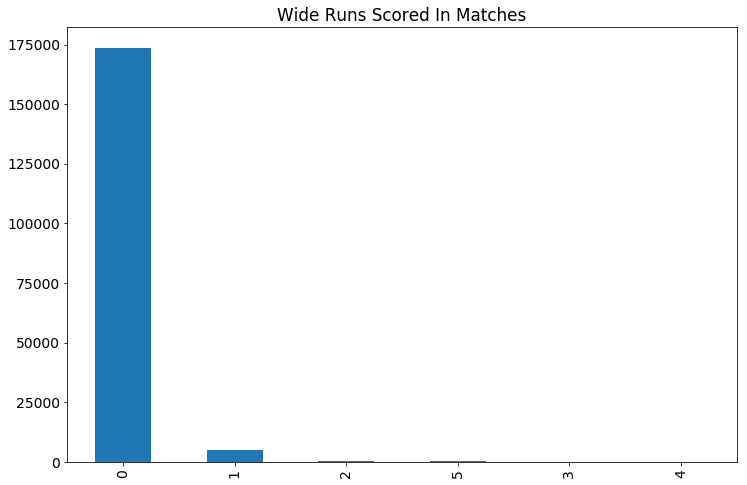

In [86]:
df_delivers['wide_runs'].value_counts().plot(kind="bar")
plt.title("Wide Runs Scored In Matches")

### Observations

#### Mumbai Indians is the most successful team in IPL.

#### Mumbai Indians has won the most number of toss.

#### The Mumbai city has hosted the most number of IPL matches.

#### Chris Gayle has won the maximum number of player of the match title.

#### S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.

#### Eden Gardens has hosted the maximum number of IPL matches.

#### Till 2019, 40 venues have hosted 756 IPL matches.

### Thank you